### Student Information
Name: 莊智宇

Student ID: 113065540

GitHub ID:

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [1]:
### Begin Assignment Here

# First Part: DM2024-Lab1-Master

---

# Second Part: Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data

## 1. Data Preparation

In [2]:
import pandas as pd

In [3]:
comments_data = pd.read_csv("Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

In [4]:
print(comments_data)

          sentiment                                            comment
0     not nostalgia  He was a singer with a golden voice that I lov...
1         nostalgia  The mist beautiful voice ever I listened to hi...
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4         nostalgia  listening to his songs reminds me of my mum wh...
...             ...                                                ...
1495  not nostalgia  i don't know!..but the opening of the video,.....
1496  not nostalgia  it's sad this is such a beautiful song when yo...
1497  not nostalgia  Dear Friend, I think age and time is not that ...
1498      nostalgia  I was born in 1954 and started to be aware of ...
1499      nostalgia  This is the first CD I bought after my marriag...

[1500 rows x 2 columns]


In [5]:
print(len(comments_data))

1500


In [6]:
print(comments_data.sentiment.unique())

['not nostalgia' 'nostalgia']


In [7]:
# sentiments
sentiments = []
for ct in comments_data.sentiment.unique():
    sentiments.append(ct)
print(sentiments)

['not nostalgia', 'nostalgia']


In [8]:
# check some comments' data
for cm in comments_data.comment[:3]:
    print(cm + '\n')

He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.

The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel

I have most of Mr. Reeves songs.  Always love his smooth voice, so comforting and sounds like the people I grew up around.  They were so gentle and sweet, but I had to leave my little town to find a job at age 17.  I graduated early.  I never forgot how great it was to grow up with simple people who had no pretensions -- just loving and gentle, like I think Jesus is.



## 2. Data Mining using Pandas

In [9]:
import helpers.data_mining_helpers as dmh

### 2.1 Missing Values

In [10]:
# check missing values
comments_data.isnull()

sentiment  comment
0         False    False
1         False    False
2         False    False
3         False    False
4         False    False
...         ...      ...
1495      False    False
1496      False    False
1497      False    False
1498      False    False
1499      False    False

[1500 rows x 2 columns]

In [11]:
comments_data.isnull().apply(lambda x: dmh.check_missing_values(x))

sentiment                             comment
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0

In [12]:
comments_data.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

### 2.2 Duplicate Data

In [13]:
comments_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [14]:
sum(comments_data.duplicated())

1

In [15]:
# There is a duplicated data. Let's check it.
duplicated_rows = comments_data[comments_data.duplicated(keep=False)]
print(duplicated_rows)
print(len(comments_data))

        sentiment                                            comment
62  not nostalgia  never heard this song before... WOW What an am...
78  not nostalgia  never heard this song before... WOW What an am...
1500


In [16]:
# Drop the duplicated data.
comments_data.drop_duplicates(inplace=True, ignore_index=True)
print(len(comments_data))

1499


## 3. Data Preprocessing

### 3.1 Sampling

In [17]:
comments_data_sample = comments_data.sample(n=600)

In [18]:
print(len(comments_data_sample))
print(comments_data_sample[:10])

600
          sentiment                                            comment
1287  not nostalgia  this music make up my day ,I real love listeni...
1155  not nostalgia  This is incredible! Sounds like a 90s house tr...
15    not nostalgia  This song/singer has very special meaning as i...
105       nostalgia  I ruined a relationship with the most beautifu...
201   not nostalgia  I think he's his most comfortable with this lo...
1255      nostalgia  Met my first love and this song was mine to he...
466       nostalgia                 wish i could go back to those days
904   not nostalgia  This song is so beautiful even though it's onl...
388       nostalgia  Marvelous song, tastefully song. What memories...
866       nostalgia  This song makes me remember about the great ti...


In [19]:
import matplotlib.pyplot as plt

sentiment
nostalgia        750
not nostalgia    749
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

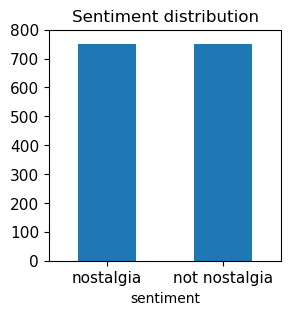

In [20]:
#Plot a chart of the amount of different sentiment from the original data set.

print(comments_data.sentiment.value_counts())

upper_bound = max(comments_data.sentiment.value_counts())+50
comments_data.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Sentiment distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 11, figsize = (3,3))

sentiment
nostalgia        302
not nostalgia    298
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

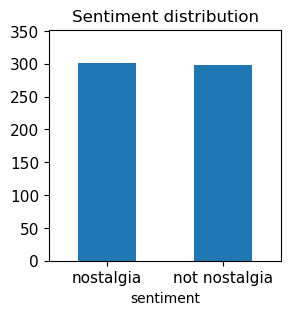

In [21]:
# Plot a chart of the amount of different sentiment from the sampled data set.

print(comments_data_sample.sentiment.value_counts())

upper_bound = max(comments_data_sample.sentiment.value_counts())+50
comments_data_sample.sentiment.value_counts().plot(kind = 'bar',
                                                   title = 'Sentiment distribution',
                                                   ylim = [0, upper_bound],        
                                                   rot = 0, fontsize = 11, figsize = (3,3))

### 3.2 Feature Creation

In [22]:
import nltk

In [23]:
# Tokenize the comment data
comments_data['unigrams'] = comments_data['comment'].apply(lambda x: dmh.tokenize_text(x))

In [24]:
print(comments_data)
print(comments_data['unigrams'])

          sentiment                                            comment  \
0     not nostalgia  He was a singer with a golden voice that I lov...   
1         nostalgia  The mist beautiful voice ever I listened to hi...   
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4         nostalgia  listening to his songs reminds me of my mum wh...   
...             ...                                                ...   
1494  not nostalgia  i don't know!..but the opening of the video,.....   
1495  not nostalgia  it's sad this is such a beautiful song when yo...   
1496  not nostalgia  Dear Friend, I think age and time is not that ...   
1497      nostalgia  I was born in 1954 and started to be aware of ...   
1498      nostalgia  This is the first CD I bought after my marriag...   

                                               unigrams  
0     [He, was, a, singer, with, a, golden, voice, t.

In [25]:
list(comments_data[:1]['unigrams'])

[['He',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'I',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'I',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'Although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'I',
  'can',
  'vouch',
  'for',
  'Jim',
  'Reeves',
  'all',
  'the',
  'time',
  '.',
  'You',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'Thank',
  'you',
  'Lord',
  'for',
  'his',
  'life',
  '.']]

---

### 3.3 Feature subset selection

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
comments_data_counts = count_vect.fit_transform(comments_data.comment) #learn the vocabulary and return document-term matrix
print(comments_data_counts[0])

  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


In [27]:
print(count_vect.get_feature_names_out()[1598])
print(count_vect.get_feature_names_out()[3570])
print(count_vect.get_feature_names_out()[2973])

he
was
singer


In [28]:
# Check how it do tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram).
analyze = count_vect.build_analyzer()
analyze(comments_data.comment[0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

In [29]:
# We can check the shape of this matrix by:
print(comments_data_counts.shape)

(1499, 3730)


In [30]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [31]:
# we convert from sparse array to normal array
comments_data_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

---

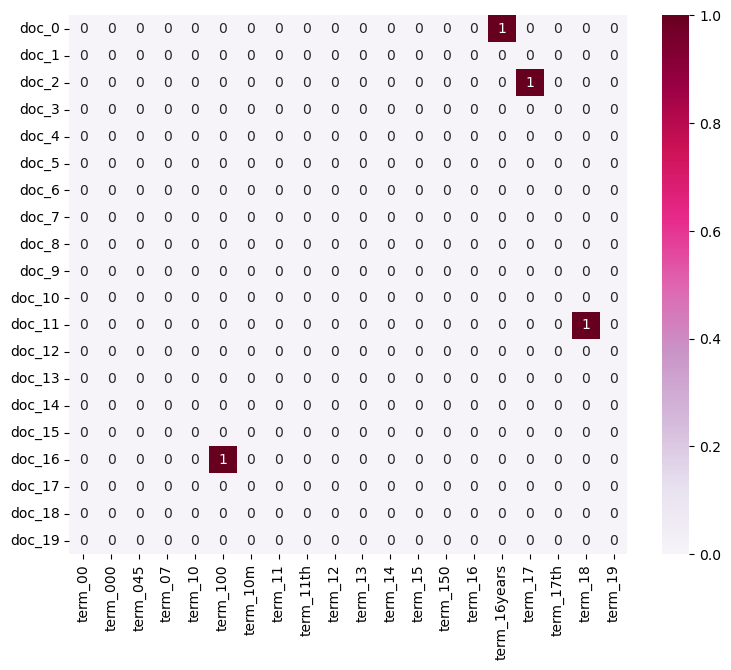

In [32]:
#Create a heatmap to display the document-term matrix, using the top 20 records.

import seaborn as sns

# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(comments_data.index)[0:20]]

plot_z = comments_data_counts[0:20, 0:20].toarray() # comments_data_counts[how many documents, how many terms]

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

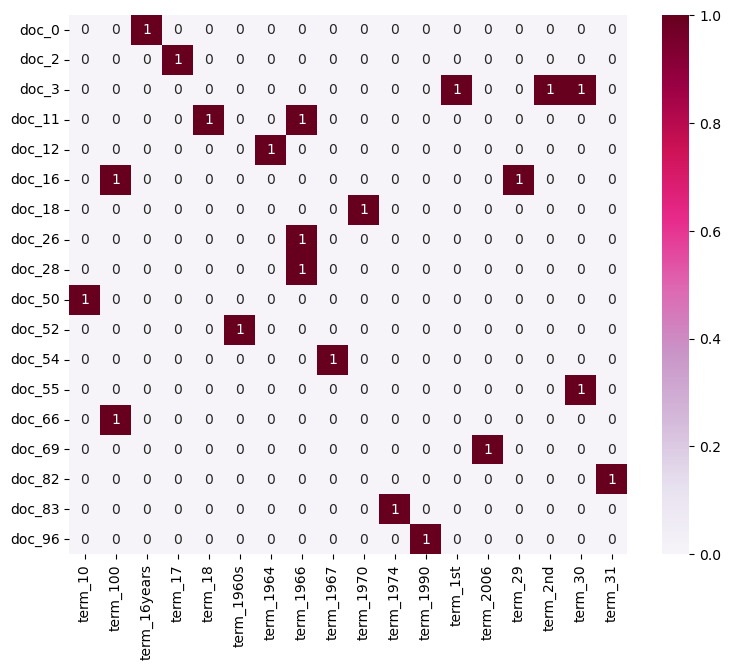

In [33]:
#Create a heatmap to display the document-term matrix, showing only the entries with a value of 1, using the top 100 records.

# first 100 features only
plot_x_2 = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:100]]

# obtain document index
plot_y_2 = ["doc_"+ str(i) for i in list(comments_data.index)[0:100]]

plot_z_2 = comments_data_counts[0:100, 0:100].toarray() #X_counts[how many documents, how many terms]

df_todraw_2 = pd.DataFrame(plot_z_2, columns = plot_x_2, index = plot_y_2)

#Keep the data that have values of 1.
df_todraw_2 = df_todraw_2.loc[(df_todraw_2 == 1).any(axis=1), (df_todraw_2 == 1).any(axis=0)]

plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw_2,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### 3.4 Attribute Transformation / Aggregation

In [34]:
# Compute the sum of term's freguencies.

import numpy as np

term_frequencies = np.asarray(comments_data_counts.sum(axis=0))[0]

In [35]:
print(len(term_frequencies))
print(term_frequencies)
print(term_frequencies[0]) #sum of first term:

3730
[1 2 1 ... 1 1 1]
1


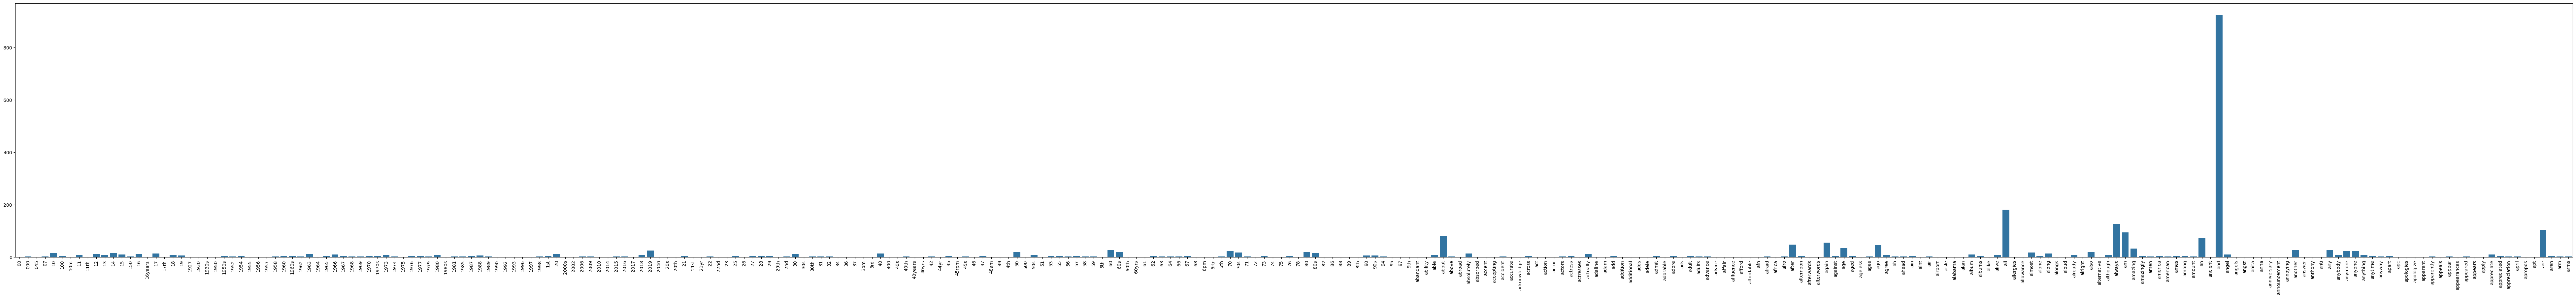

In [36]:
# Create a bar chart showing the frequency of the top 300 terms.

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticks(np.arange(0, 300))
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)
plt.show()

In [37]:
# Use ploty

import plotly.express as px

fig = px.bar(comments_data_counts, x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
fig.show()

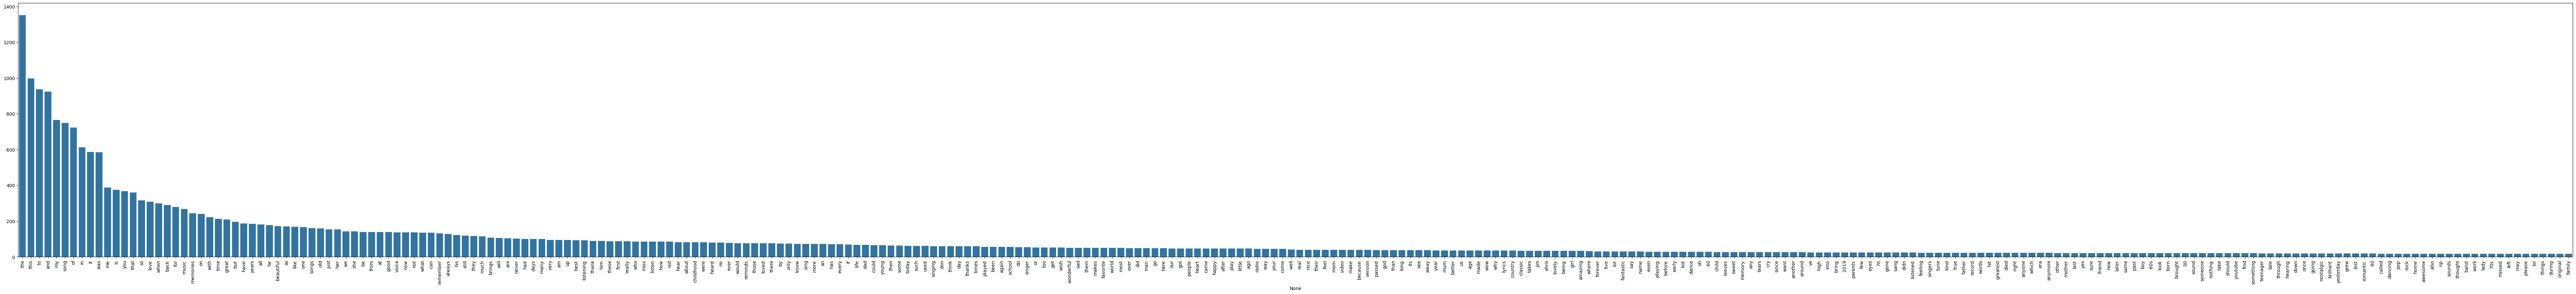

In [38]:
# Create a bar chart showing the SORTED frequencies of the top 300 terms.

comments_data_counts_sort = pd.Series(term_frequencies, index=count_vect.get_feature_names_out())
comments_data_counts_sorted = comments_data_counts_sort.sort_values(ascending=False)

plt.subplots(figsize=(100, 10))
g3 = sns.barplot(x=comments_data_counts_sorted.index[:300], 
                 y=comments_data_counts_sorted.values[:300])
g3.set_xticks(comments_data_counts_sorted.index[:300])
g3.set_xticklabels(comments_data_counts_sorted.index[:300], rotation = 90);

#Plotly ver
#fig2 = px.bar(comments_data_counts_sorted, x=comments_data_counts_sorted.index[:300], y=comments_data_counts_sorted.values[:300])
#fig2.show()

In [39]:
### Use log

import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

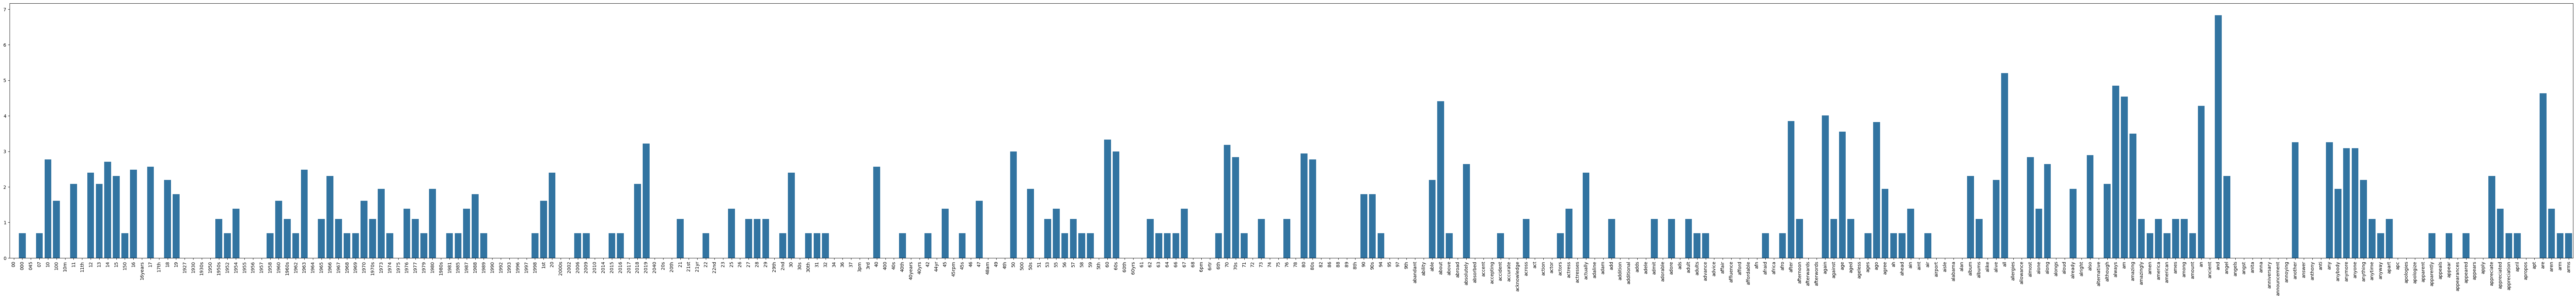

In [40]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies_log[:300])
g.set_xticks(np.arange(0, 300))
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)
plt.show()

In [41]:
# Sorted terms frequencies data

fig3 = px.bar(comments_data_counts_sorted, x=comments_data_counts_sorted.index[:300], y=comments_data_counts_sorted.values[:300])
fig3.show()

####  Finding frequent patterns

In [42]:
sentiment_dfs = {}  # Dictionary to store DataFrames for each sentiment

for sentiment in sentiments:
    # Filter the original DataFrame by sentiment
    sentiment_dfs[sentiment] = comments_data[comments_data['sentiment'] == sentiment].copy()

# Function to create term-document frequency DataFrame for each sentiment
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    comments_data_counts = count_vect.fit_transform(df['comment'])  # Transform the comment data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(comments_data_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each sentiment
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each sentiment

for sentiment in sentiments:
    filt_term_document_dfs[sentiment] = create_term_document_df(sentiment_dfs[sentiment])

In [43]:
# Display the filtered DataFrame for one of the sentiments.
sentiment_number=0 #You can change it from 0 to 1
print(f"Filtered Term-Document Frequency DataFrame for Sentiment {sentiments[sentiment_number]}:")
filt_term_document_dfs[sentiments[sentiment_number]]

Filtered Term-Document Frequency DataFrame for Sentiment not nostalgia:


00  000  045  10  100  10m  11  12  14  15  ...  youngest  youngsters  \
0     0    0    0   0    0    0   0   0   0   0  ...         0           0   
1     0    0    0   0    0    0   0   0   0   0  ...         0           0   
2     0    0    0   0    0    0   0   0   0   0  ...         0           0   
3     0    0    0   0    0    0   0   0   0   0  ...         0           0   
4     0    0    0   0    0    0   0   0   0   0  ...         0           0   
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ..  ...       ...         ...   
744   0    0    0   0    0    0   0   0   0   0  ...         0           0   
745   0    0    0   0    0    0   0   0   0   0  ...         0           0   
746   0    0    0   0    0    0   0   0   0   0  ...         0           0   
747   0    0    0   0    0    0   0   0   0   0  ...         0           0   
748   0    0    0   0    0    0   0   0   0   0  ...         0           0   

     your  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0       0         0      0        0    0    0        0      0  
1       0         0      0        0    0    0        0      0  
2       0         0      0        0    0    0        0      0  
3       0         0      0        0    0    0        0      0  
4       0         0      0        0    0    0        0      0  
..    ...       ...    ...      ...  ...  ...      ...    ...  
744     0         0      0        0    0    0        0      0  
745     0         0      0        0    0    0        0      0  
746     0         0      0        0    0    0        0      0  
747     1         0      0        0    0    0        0      0  
748     0         0      0        0    0    0        0      0  

[749 rows x 2602 columns]

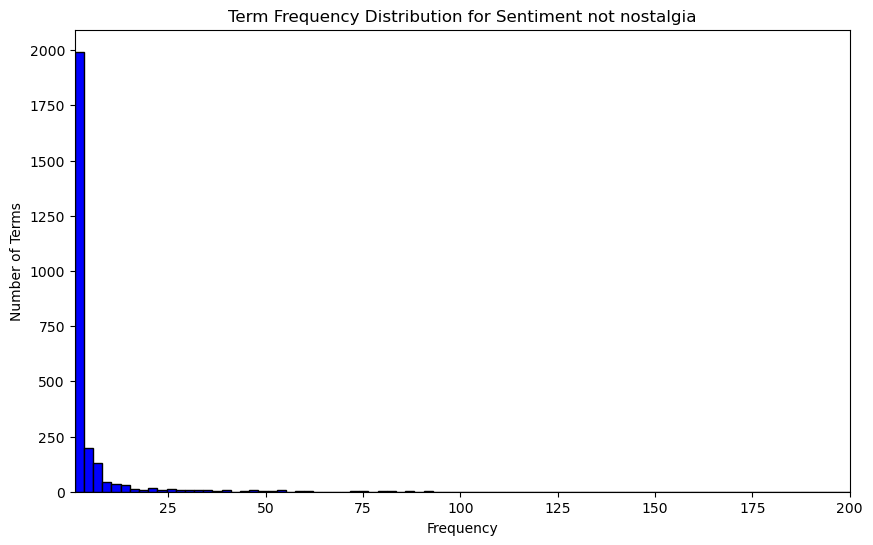

In [44]:
# Sum over all documents to get total frequency for each word
sentiment_number=0 #You can change it from 0 to 1
word_counts = filt_term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=300, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Sentiment {sentiments[sentiment_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [45]:
# Check the bottom 1% and top 5% words.

sentiment_number=0 #You can change it from 0 to 1

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each sentiment
term_document_dfs = {}

for sentiment in sentiments:
    print(f'\nFor sentiment {sentiment} we filter the following words:')
    term_document_dfs[sentiment] = filter_top_bottom_words_by_sum(filt_term_document_dfs[sentiment])

# Example: Display the filtered DataFrame for one of the sentiments
print(f"Filtered Term-Document Frequency DataFrame for Sentiment {sentiments[sentiment_number]}:")
print(term_document_dfs[sentiments[sentiment_number]])


For sentiment not nostalgia we filter the following words:
Bottom 1.0% words: 
00               1
montgomery       1
money            1
monday           1
moments          1
mocking          1
mock             1
mitch            1
misunderstood    1
minute           1
minds            1
miller           1
monumental       1
millennium       1
miles            1
microphone       1
miami            1
meta             1
mess             1
merle            1
mendes           1
mended           1
melting          1
melt             1
melodica         1
milestone        1
dtype: int64
Top 5.0% words: 
got         23
amazing     23
first       23
wish        24
any         25
          ... 
of         361
to         394
and        451
this       452
the        708
Length: 130, dtype: int64

For sentiment nostalgia we filter the following words:
Bottom 1.0% words: 
yup            1
gospel         1
rose           1
round          1
rousing        1
goodness       1
routine        1
row       

In [46]:
# Convert the dataframe into a transactional database that the PAMI library can work with.

from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for sentiment in term_document_dfs:
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[sentiment])

    obj.convert2TransactionalDatabase(f'td_freq_db_{sentiment}.csv', '>=', 1) #set the transactional threshold to be **greater than or equal to 1**.

Database size (total no of transactions) : 745
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.410738255033557
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.926429722323316
Variance in Transaction Sizes : 35.16977700801039
Sparsity : 0.9965614316210002


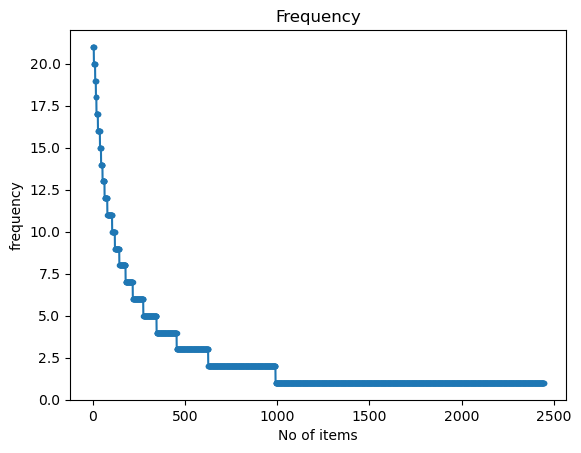

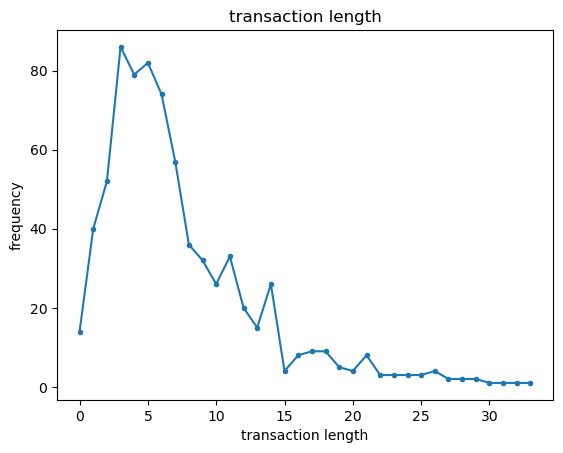

In [47]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.103722524357735
Sparsity : 0.9959733855996001


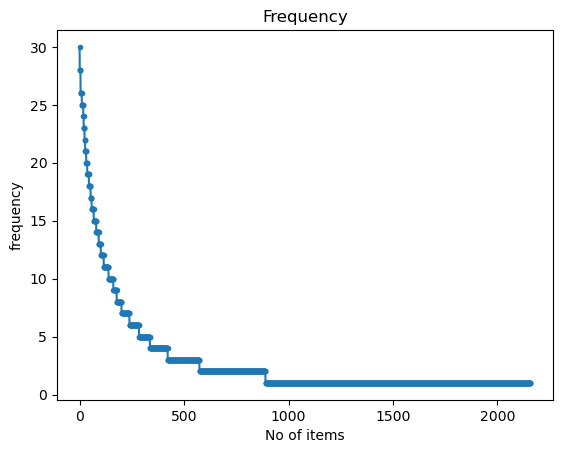

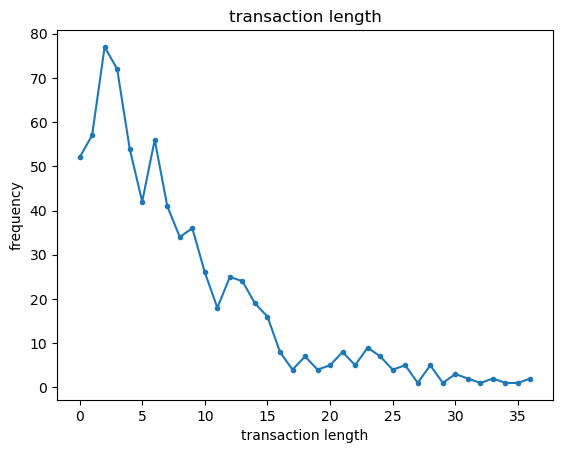

In [48]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [49]:
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_not_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime
print(frequentPatternsDF_not_nostalgia)
obj1.save('freq_patterns_not_nostalgia_minSup9.txt') #save the patterns

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.00521087646484375
      Patterns  Support
0    favorites        9
1      special        9
2         soul        9
3         mind        9
4           60        9
..         ...      ...
139      every       21
140      loved       21
141    classic       21
142       them       21
143     lyrics       21

[144 rows x 2 columns]


In [50]:
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_nostalgia= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime
print(frequentPatternsDF_nostalgia)
obj2.save('freq_patterns_nostalgia_minSup9.txt') #save the patterns

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.008756875991821289
     Patterns  Support
0        find        9
1        down        9
2         few        9
3         its        9
4        sure        9
..        ...      ...
175      ever       28
176     would       28
177      will       28
178        go       28
179  favorite       30

[180 rows x 2 columns]


In [51]:
# We group together all of the dataframes related to our found patterns

dfs = [frequentPatternsDF_not_nostalgia, frequentPatternsDF_nostalgia]

# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

      Patterns  Support
219       will       28
218      would       28
217       ever       28
216       wish       26
215         or       26
..         ...      ...
96       along        9
1      special        9
95    together        9
94        left        9
0    favorites        9

[220 rows x 2 columns]
Number of patterns discarded: 104


In [52]:
# Convert 'comment' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
comments_data_tdm = count_vect.fit_transform(comments_data['comment'])  # X['text'] contains the text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
comments_data['tokenized_text'] = comments_data['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=comments_data.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = comments_data['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(comments_data_tdm.toarray(), columns=terms, index=comments_data.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

print(augmented_df)

      00  000  045  07  10  100  10m  11  11th  12  ...  karen  place  \
0      0    0    0   0   0    0    0   0     0   0  ...      0      0   
1      0    0    0   0   0    0    0   0     0   0  ...      0      0   
2      0    0    0   0   0    0    0   0     0   0  ...      0      0   
3      0    0    0   0   0    0    0   0     0   0  ...      0      0   
4      0    0    0   0   0    0    0   0     0   0  ...      0      0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...    ...   
1494   0    0    0   0   0    0    0   0     0   0  ...      0      0   
1495   0    0    0   0   0    0    0   0     0   0  ...      0      0   
1496   0    0    0   0   0    0    0   0     0   0  ...      0      0   
1497   0    0    0   0   0    0    0   0     0   0  ...      0      0   
1498   0    0    0   0   0    0    0   0     0   0  ...      0      0   

      records  until  tv  along  special  together  left  favorites  
0           0      0   0      0        0         0   

### 3.5 Dimensionality Reduction

In [53]:
# Applying dimensionality reduction with the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
comments_data_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
comments_data_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
comments_data_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [54]:
print(comments_data_pca_tdm.shape)
print(comments_data_tsne_tdm.shape)
print(comments_data_umap_tdm.shape)

(1499, 2)
(1499, 2)
(1499, 2)


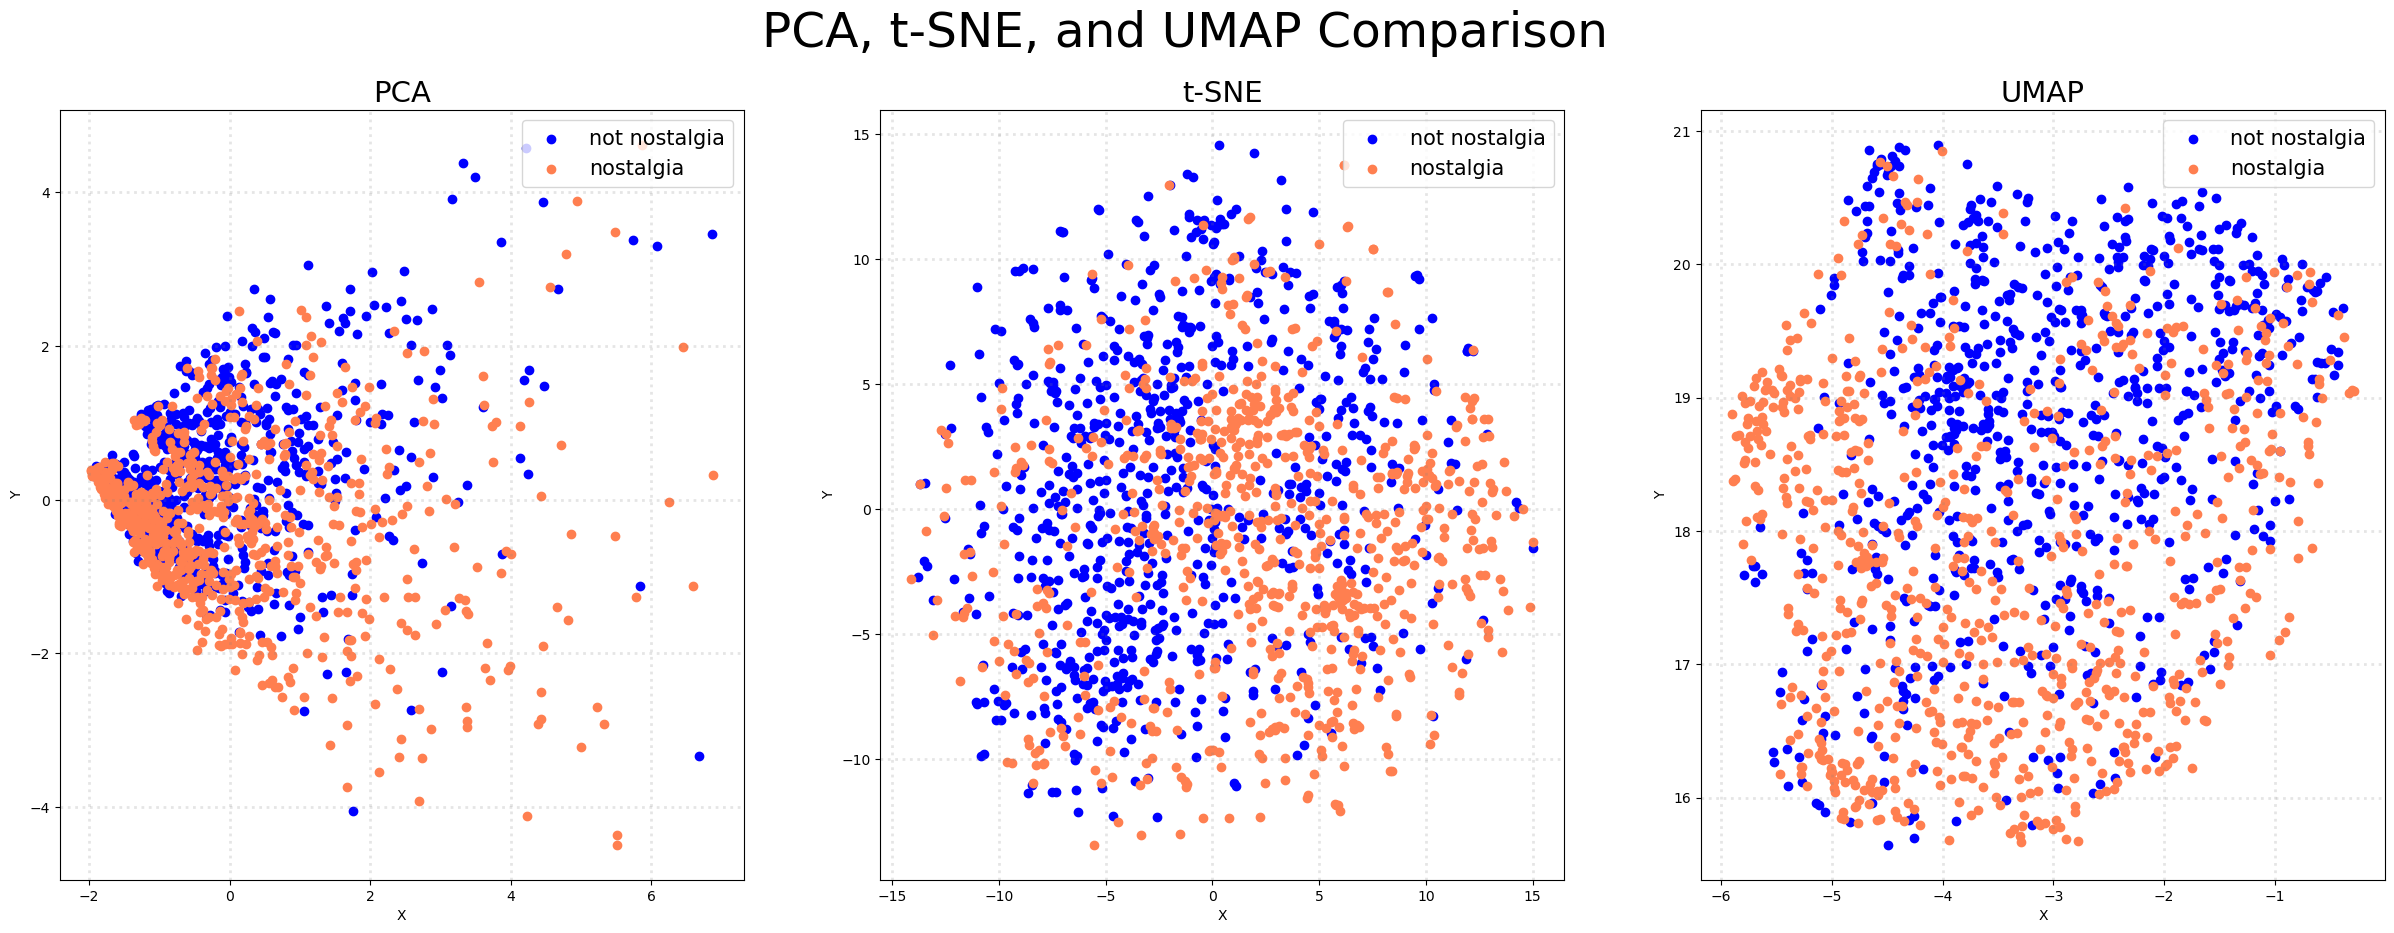

In [55]:
# Plot the results in subplots
col = ['blue', 'coral']
sentiments = comments_data['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison', fontsize=35)

# Define a function to create a scatter plot for each method
def plot_scatter(ax, comments_data_reduced, title):
    for c, sentiment in zip(col, sentiments):
        xs = comments_data_reduced[comments_data['sentiment'] == sentiment].T[0]
        ys = comments_data_reduced[comments_data['sentiment'] == sentiment].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=sentiment)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title, fontsize=21)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(sentiments, loc='upper right', fontsize=15)

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], comments_data_pca_tdm, 'PCA')
plot_scatter(axes[1], comments_data_tsne_tdm, 't-SNE')
plot_scatter(axes[2], comments_data_umap_tdm, 'UMAP')

plt.show()

In [56]:
#Applying dimensionality reduction with the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
comments_data_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
comments_data_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
comments_data_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

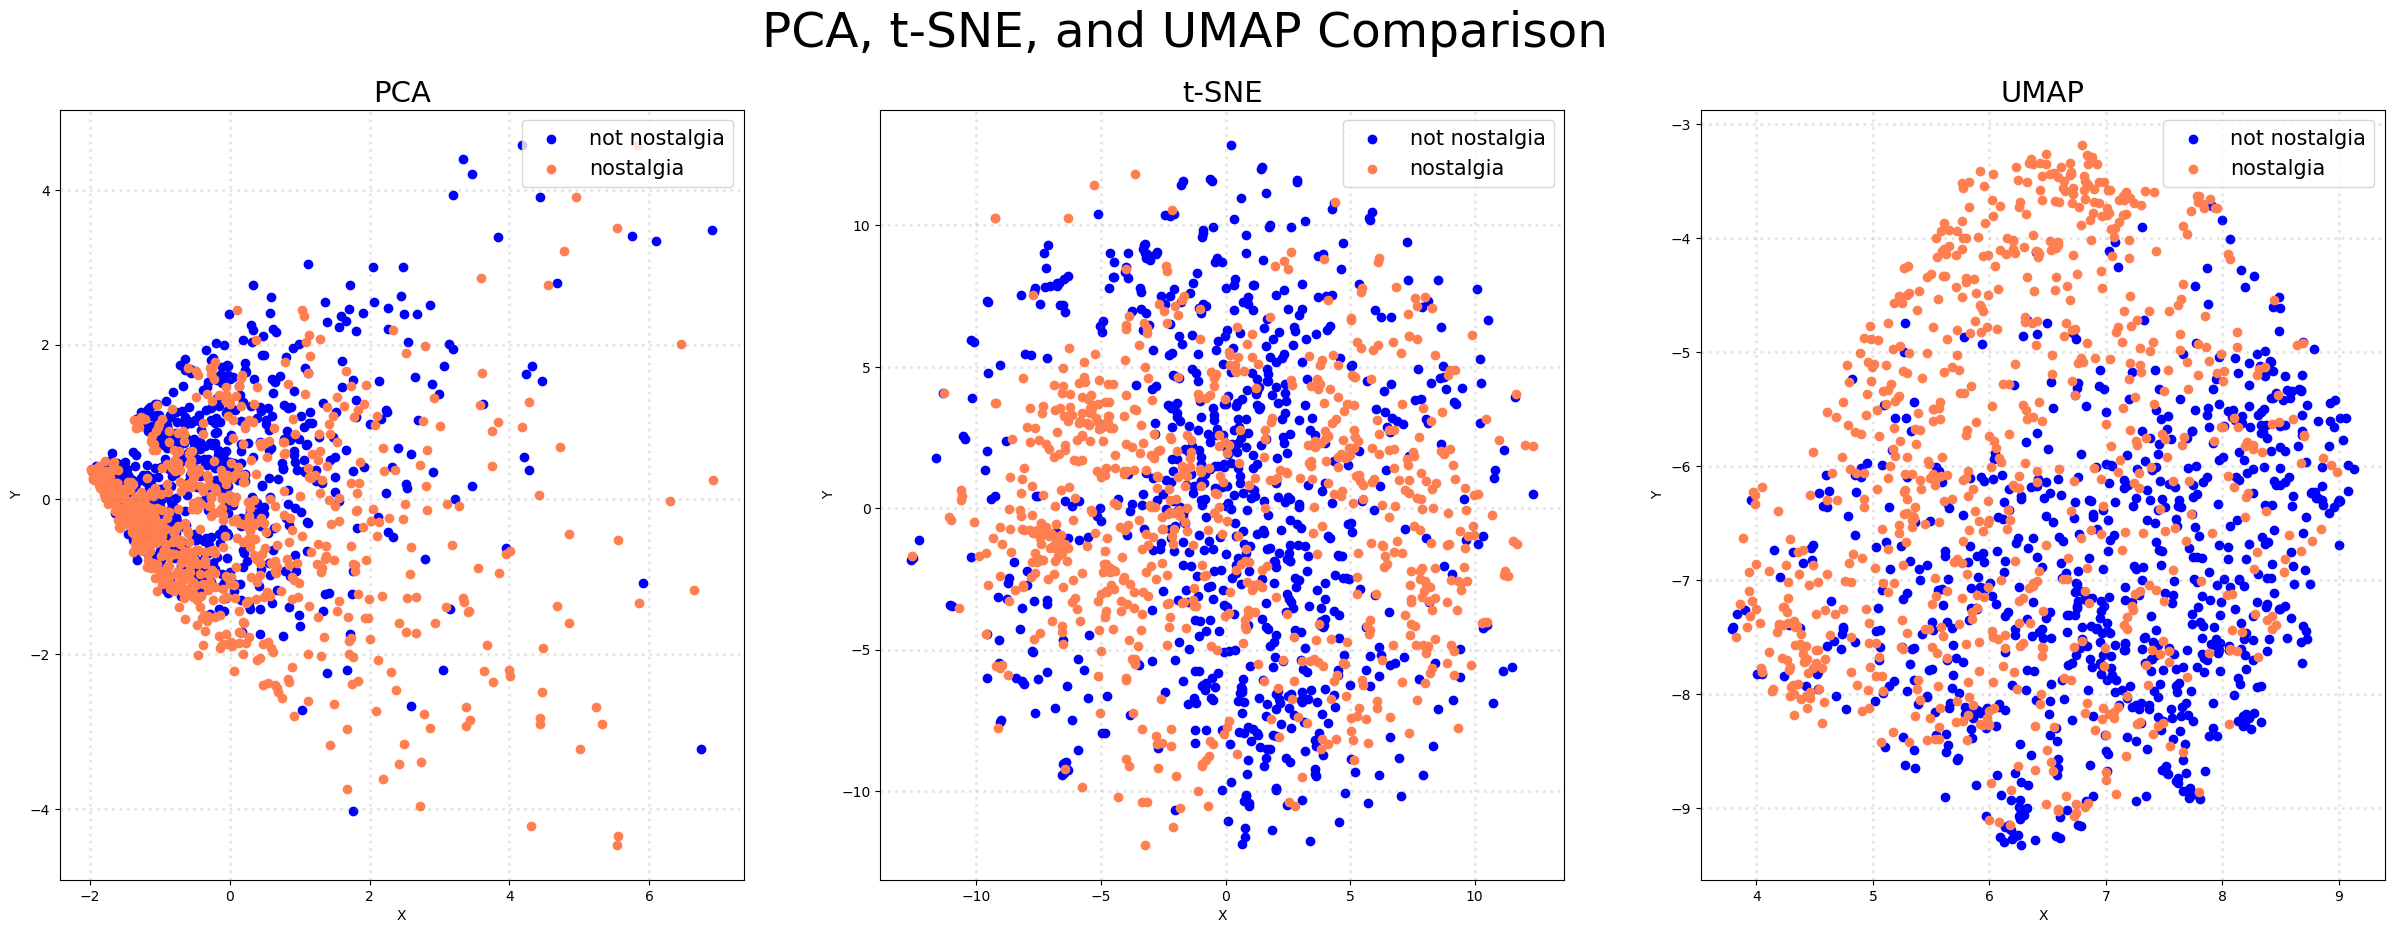

In [57]:
# Plot the results in subplots
col = ['blue', 'coral']
sentiments = comments_data['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison', fontsize=35)

# Define a function to create a scatter plot for each method
def plot_scatter(ax, comments_data_reduced, title):
    for c, sentiment in zip(col, sentiments):
        xs = comments_data_reduced[comments_data['sentiment'] == sentiment].T[0]
        ys = comments_data_reduced[comments_data['sentiment'] == sentiment].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=sentiment)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title, fontsize=21)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(sentiments, loc='upper right', fontsize=15)

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], comments_data_pca_aug, 'PCA')
plot_scatter(axes[1], comments_data_tsne_aug, 't-SNE')
plot_scatter(axes[2], comments_data_umap_aug, 'UMAP')

plt.show()

### 3.6 Discretization and Binarization

In [58]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [59]:
mlb = preprocessing.LabelBinarizer()

In [60]:
mlb.fit(comments_data.sentiment)

LabelBinarizer()

In [61]:
# Transform the attribute, sentiment, into one binary attributes.

comments_data['bin_sentiment'] = mlb.transform(comments_data['sentiment']).tolist()

In [62]:
print(comments_data[0:9])

       sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4      nostalgia  listening to his songs reminds me of my mum wh...   
5      nostalgia  Every time I heard this song as a child, I use...   
6      nostalgia  My dad loved listening to Jim Reeves, when I w...   
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...   
8  not nostalgia           Wherever you  are you always in my heart   

                                            unigrams  \
0  [He, was, a, singer, with, a, golden, voice, t...   
1  [The, mist, beautiful, voice, ever, I, listene...   
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4  [liste

## 4. Data Exploration

In [63]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = comments_data.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = comments_data.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = comments_data.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [64]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['i guess most of us leave it too late before we tell someone just how much we really love them']
['my name is thomas but know by tommy and my wifes name is laura and i always sing this to her']


In [65]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [66]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2.item()})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3.item()})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3.item()})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1.item()})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2.item()})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3.item()})

Cosine Similarity using count bw 1 and 2: 0.032174
Cosine Similarity using count bw 1 and 3: 0.027864
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


## 5. Data Classification

In [67]:
# Model with only the document-term frequency data

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets (70% train, 30% test)
comments_data_train, comments_data_test, y_train, y_test = train_test_split(tdm_df, comments_data['sentiment'], test_size=0.3, random_state=42)

In [68]:
print(comments_data_train)

      00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
485    0    0    0   0   0    0    0   0     0   0  ...      0         0   
527    0    0    0   0   0    0    0   0     0   0  ...      0         0   
199    0    0    0   0   0    0    0   0     0   0  ...      0         0   
889    0    0    0   0   0    0    0   0     0   0  ...      0         0   
844    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1130   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1294   0    0    0   0   0    0    0   0     0   0  ...      0         0   
860    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1459   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1126   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
485       0         0  

In [69]:
print(comments_data_test)

      00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
1116   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1395   0    0    0   0   0    0    0   0     0   0  ...      0         0   
422    0    0    0   0   0    0    0   0     0   0  ...      0         0   
413    0    0    0   0   0    0    0   0     0   0  ...      0         0   
451    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1083   0    0    0   0   0    0    0   0     0   0  ...      0         0   
990    0    0    0   0   0    0    0   0     0   0  ...      0         0   
650    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1187   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1458   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
1116      0         0  

In [70]:
print(y_train)

485     not nostalgia
527     not nostalgia
199     not nostalgia
889     not nostalgia
844         nostalgia
            ...      
1130        nostalgia
1294    not nostalgia
860     not nostalgia
1459    not nostalgia
1126        nostalgia
Name: sentiment, Length: 1049, dtype: object


In [71]:
print(y_test)

1116        nostalgia
1395        nostalgia
422     not nostalgia
413         nostalgia
451     not nostalgia
            ...      
1083        nostalgia
990     not nostalgia
650     not nostalgia
1187    not nostalgia
1458        nostalgia
Name: sentiment, Length: 450, dtype: object


In [72]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(comments_data_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(comments_data_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=sentiments, digits=4))

Accuracy: 0.8688888888888889

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.8222    0.9528    0.8827       233
    nostalgia     0.9389    0.7788    0.8514       217

     accuracy                         0.8689       450
    macro avg     0.8806    0.8658    0.8670       450
 weighted avg     0.8785    0.8689    0.8676       450



In [73]:
#Model with the augmented data

# Split the data into training and testing sets (70% train, 30% test)
comments_data_train, comments_data_test, y_train, y_test = train_test_split(augmented_df, comments_data['sentiment'], test_size=0.3, random_state=42)

In [74]:
print(comments_data_train)

      00  000  045  07  10  100  10m  11  11th  12  ...  karen  place  \
485    0    0    0   0   0    0    0   0     0   0  ...      0      0   
527    0    0    0   0   0    0    0   0     0   0  ...      0      0   
199    0    0    0   0   0    0    0   0     0   0  ...      0      0   
889    0    0    0   0   0    0    0   0     0   0  ...      0      0   
844    0    0    0   0   0    0    0   0     0   0  ...      0      0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...    ...   
1130   0    0    0   0   0    0    0   0     0   0  ...      0      0   
1294   0    0    0   0   0    0    0   0     0   0  ...      0      0   
860    0    0    0   0   0    0    0   0     0   0  ...      0      0   
1459   0    0    0   0   0    0    0   0     0   0  ...      0      0   
1126   0    0    0   0   0    0    0   0     0   0  ...      0      0   

      records  until  tv  along  special  together  left  favorites  
485         0      0   0      0        0         0   

In [75]:
print(comments_data_test)

      00  000  045  07  10  100  10m  11  11th  12  ...  karen  place  \
1116   0    0    0   0   0    0    0   0     0   0  ...      0      0   
1395   0    0    0   0   0    0    0   0     0   0  ...      0      0   
422    0    0    0   0   0    0    0   0     0   0  ...      0      0   
413    0    0    0   0   0    0    0   0     0   0  ...      0      0   
451    0    0    0   0   0    0    0   0     0   0  ...      0      0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...    ...   
1083   0    0    0   0   0    0    0   0     0   0  ...      0      0   
990    0    0    0   0   0    0    0   0     0   0  ...      0      0   
650    0    0    0   0   0    0    0   0     0   0  ...      0      0   
1187   0    0    0   0   0    0    0   0     0   0  ...      0      0   
1458   0    0    0   0   0    0    0   0     0   0  ...      0      0   

      records  until  tv  along  special  together  left  favorites  
1116        0      0   0      0        0         0   

In [76]:
print(y_train)

485     not nostalgia
527     not nostalgia
199     not nostalgia
889     not nostalgia
844         nostalgia
            ...      
1130        nostalgia
1294    not nostalgia
860     not nostalgia
1459    not nostalgia
1126        nostalgia
Name: sentiment, Length: 1049, dtype: object


In [77]:
print(y_test)

1116        nostalgia
1395        nostalgia
422     not nostalgia
413         nostalgia
451     not nostalgia
            ...      
1083        nostalgia
990     not nostalgia
650     not nostalgia
1187    not nostalgia
1458        nostalgia
Name: sentiment, Length: 450, dtype: object


In [78]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(comments_data_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(comments_data_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=sentiments, digits=4))

Accuracy: 0.8644444444444445

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.8185    0.9485    0.8787       233
    nostalgia     0.9333    0.7742    0.8463       217

     accuracy                         0.8644       450
    macro avg     0.8759    0.8613    0.8625       450
 weighted avg     0.8739    0.8644    0.8631       450



---

# Third Part: Attempt three tasks on **the new dataset**.

## 1. New data visualizations

### 1-1. Display the word frequencies of different terms of all comments using a word cloud.

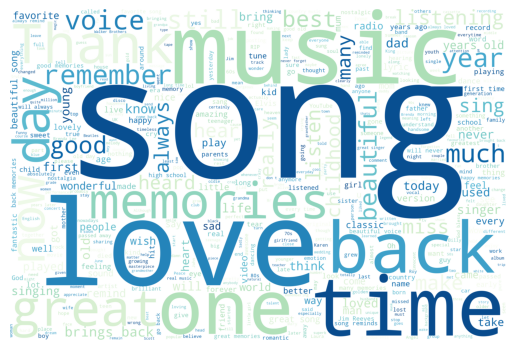

In [79]:
# word cloud

import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud

comment_str = ""
for cm in comments_data.comment:
    comment_str+=cm
    comment_str+=' '

# Display 500 words in the word cloud.
wordcloud = WordCloud(width=3000, height=2000, background_color='white', max_words=500, colormap='GnBu').generate(comment_str)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

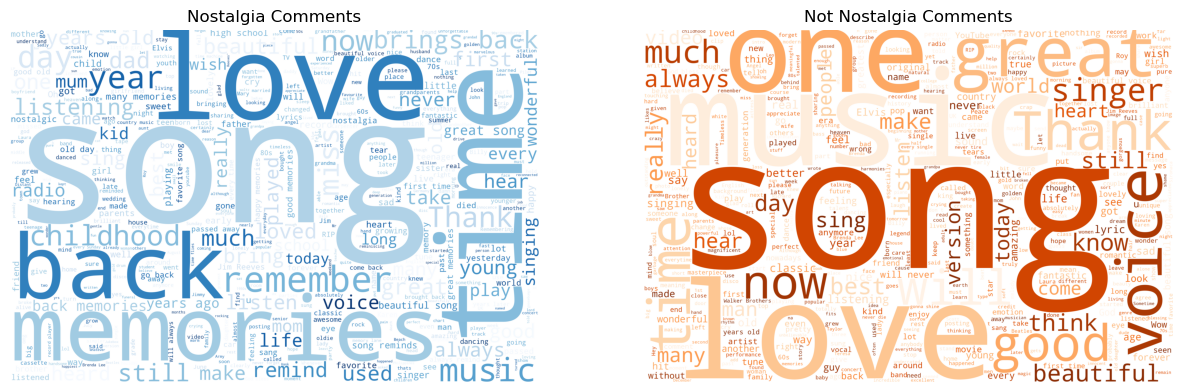

In [80]:
# Generate separate word clouds based on sentiments.

nostalgia_comments = " ".join(comments_data[comments_data['sentiment'] == 'nostalgia'].comment)
not_nostalgia_comments = " ".join(comments_data[comments_data['sentiment'] == 'not nostalgia'].comment)

wordcloud_nostalgia = WordCloud(width=3000, height=2000, background_color='white', max_words=500, colormap='Blues').generate(nostalgia_comments)
wordcloud_not_nostalgia = WordCloud(width=3000, height=2000, background_color='white', max_words=500, colormap='Oranges').generate(not_nostalgia_comments)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 9))

ax1.imshow(wordcloud_nostalgia)
ax1.set_title("Nostalgia Comments")
ax1.axis('off')

ax2.imshow(wordcloud_not_nostalgia)
ax2.set_title("Not Nostalgia Comments")
ax2.axis('off')

plt.show()

## 2. TF-IDF features

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer()
comments_data_counts_tfidf = vectorizer_tfidf.fit_transform(comments_data.comment)

tfidf_df = pd.DataFrame(comments_data_counts_tfidf.toarray(), columns=terms, index=comments_data.index)

print(comments_data_counts_tfidf)
print(tfidf_df)

  (0, 1598)	0.10512815802912398
  (0, 3570)	0.1395574769171071
  (0, 2973)	0.13337780025660986
  (0, 3650)	0.09117642312434776
  (0, 1470)	0.17742470356320433
  (0, 3534)	0.10560382174971122
  (0, 3282)	0.08099760357962565
  (0, 2028)	0.08426437228313143
  (0, 3336)	0.05656163791989449
  (0, 1606)	0.11892115591975148
  (0, 233)	0.19791015577918225
  (0, 3284)	0.1516330924946833
  (0, 3328)	0.18797687737677285
  (0, 1651)	0.22761435073116082
  (0, 1512)	0.09515621480982876
  (0, 1249)	0.19852539212933534
  (0, 323)	0.10633155023896874
  (0, 214)	0.14662969149477417
  (0, 2341)	0.061599247801622355
  (0, 15)	0.23196919224604873
  (0, 1733)	0.06689075657536095
  (0, 3304)	0.12462022324106113
  (0, 907)	0.11318589137806082
  (0, 258)	0.11457641683536417
  (0, 3124)	0.11082028545327519
  :	:
  (1498, 2254)	0.11862818002855156
  (1498, 1798)	0.07680587844223077
  (1498, 3704)	0.19216392413911518
  (1498, 1923)	0.16083530896416567
  (1498, 3300)	0.15015304146671557
  (1498, 3044)	0.1143173648

## 3. Naive Bayes classifier

In [82]:
from sklearn.feature_extraction.text import CountVectorizer

# word frequency features data
count_vect = CountVectorizer()
comments_data_counts = count_vect.fit_transform(comments_data.comment)

wf_df = pd.DataFrame(comments_data_counts.toarray(), columns=terms, index=comments_data.index)

print(comments_data_counts)
print(wf_df)

  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  :	:
  (1498, 2254)	2
  (1498, 1798)	1
  (1498, 3704)	2
  (1498, 1923)	1
  (1498, 3300)	3
  (1498, 3044)	2
  (1498, 1026)	1
  (1498, 2699)	1
  (1498, 3504)	1
  (1498, 1308)	1
  (1498, 208)	2
  (1498, 516)	1
  (1498, 637)	1
  (1498, 78)	1
  (1498, 1132)	1
  (1498, 863)	1
  (1498, 603)	2
  (1498, 3637)	1
  (1498, 1049)	1
  (1498, 87)	1
  (1498, 2027)	1
  (1498, 2089)	1
  (1498, 998)	1
  (1498, 3414)	1
  (1498, 2779)	1
      00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
0      0    0    0   0   0    0    0   0     0   0  ...      0         0   
1      0    0    0   0   0    0    0   0     0   0  ...      0         0   
2      0

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, accuracy_score

# Split the data(word frequency) into training and testing sets (70% train, 30% test)
comments_data_train, comments_data_test, y_train, y_test = train_test_split(wf_df, comments_data['sentiment'], test_size=0.3, random_state=42)

# Split the data(TF-IDF) into training and testing sets (70% train, 30% test)
comments_data_train_tfidf, comments_data_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_df, comments_data['sentiment'], test_size=0.3, random_state=42)

#### Use MultinomialNB to handle Word Frequency and TF-IDF data first.

In [84]:
# word frequency data
# Train the Naive Bayes classifier MultinomialNB
nb_classifier_multi = MultinomialNB()
nb_classifier_multi.fit(comments_data_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier_multi.predict(comments_data_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=sentiments, digits=4))

Accuracy: 0.8688888888888889

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.8222    0.9528    0.8827       233
    nostalgia     0.9389    0.7788    0.8514       217

     accuracy                         0.8689       450
    macro avg     0.8806    0.8658    0.8670       450
 weighted avg     0.8785    0.8689    0.8676       450



In [85]:
# TF-IDF data
# Train the Naive Bayes classifier MultinomialNB
nb_classifier_multi.fit(comments_data_train_tfidf, y_train_tfidf)

# Make predictions on the test set
y_pred_tfidf = nb_classifier_multi.predict(comments_data_test_tfidf)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test_tfidf, y_pred_tfidf))
print("\nClassification Report:\n", classification_report(y_test_tfidf, y_pred_tfidf, target_names=sentiments, digits=4))

Accuracy: 0.8622222222222222

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.8132    0.9528    0.8775       233
    nostalgia     0.9379    0.7650    0.8426       217

     accuracy                         0.8622       450
    macro avg     0.8755    0.8589    0.8601       450
 weighted avg     0.8733    0.8622    0.8607       450



It can be found that the prediction accuracy of the Word Frequency data is relatively higher.

#### Considering that this dataset has only two sentiments, we try using BernoulliNB.

In [86]:
# word frequency data
# Train the Naive Bayes classifier BernoulliNB
nb_classifier_b = BernoulliNB()
nb_classifier_b.fit(comments_data_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier_b.predict(comments_data_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=sentiments, digits=4))

Accuracy: 0.8844444444444445

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.8521    0.9399    0.8939       233
    nostalgia     0.9275    0.8249    0.8732       217

     accuracy                         0.8844       450
    macro avg     0.8898    0.8824    0.8835       450
 weighted avg     0.8885    0.8844    0.8839       450



In [87]:
# TF-IDF data
# Train the Naive Bayes classifier BernoulliNB
nb_classifier_b.fit(comments_data_train_tfidf, y_train_tfidf)

# Make predictions on the test set
y_pred_tfidf = nb_classifier_b.predict(comments_data_test_tfidf)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test_tfidf, y_pred_tfidf))
print("\nClassification Report:\n", classification_report(y_test_tfidf, y_pred_tfidf, target_names=sentiments, digits=4))

Accuracy: 0.8844444444444445

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.8521    0.9399    0.8939       233
    nostalgia     0.9275    0.8249    0.8732       217

     accuracy                         0.8844       450
    macro avg     0.8898    0.8824    0.8835       450
 weighted avg     0.8885    0.8844    0.8839       450



It can be found that BernoulliNB has a higher accuracy, and the performance results of both Word Frequency and TF-IDF data are the same.

---

# Fourth Part: How can we improve the Data preprocessing for these specific datasets?